# Extracting faces from the news paper!

From a set of news pages, extract all the faces that appear in the pages that contain a keyword.

In [22]:
import cv2 as cv
from PIL import Image
import pytesseract
from zipfile import ZipFile
import numpy as np
import os
import math

def extract_files(file_name):
    '''
    extracts the files inside a zip and returns a list containing the file names.
    
    '''
    from zipfile import ZipFile

    with ZipFile(file_name, 'r') as f:
        print('Extracting all the files now...')
        f.extractall() # f.extractall(path = to_extract_to)
        f_names = f.namelist()
    
        print('Done!')

    return f_names

def extract_text(ima_path):
    '''
    returns the text found in a specific image
    
    '''
    # OPEN RAW IMAGE
    ima_PIL = Image.open(ima_path)
    
    # EXTRACT THE TEXT OF THE IMAGE USING PYTESSERACT
    text = pytesseract.image_to_string(ima_PIL)
    
    return text

def extract_faces(file):
    ''' 
    returns the faces found in an image using the pretrained OpenCV models
    
    '''
    face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')
    
    img = cv.imread(file)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    
    faces = face_cascade.detectMultiScale(gray, 1.3, 5).tolist()
    return faces

def get_faces_from_keyword(images_path, keyword):
    '''
    returns a list of contact sheets created for those pages where the keyword was found.
    The contact sheet contains the faces found in the image
    
    '''
    
    # Get the file names of the images to be explored
    if images_path[-3:] == 'zip':
        # If a zip is passed, extract it
        imas_ls = extract_files(images_path)
    else:
        imas_ls = os.listdir(images_path)
        
    # Set a data structure to store all the faces detected
    contact_sheets = [] # list to store all the contact sheets containing the faces
    
    # Iterate over the images to find the keyword in the text
    for ima in imas_ls:
        print("Working on file: {name}".format(name=ima))
        text = extract_text(ima)
        
        # If the keyword is found, extract the faces in the image and store them
        if keyword.upper() not in text.upper():
            print("Keyword not found in file: {name}".format(name=ima))
            continue
        
        try:
            faces = extract_faces(ima)
        except AttributeError:
            print("Faces not found in file: {name}".format(name=ima))
            continue
    
        # Build a contact sheet to store the faces
        img = Image.open(ima)
        size = 110
        width = 110 * 5
        height = 110 * math.ceil(len(faces) / 5) 
        
        contact_sheet = Image.new(img.mode, (width, height))
        
        # Paste the faces found to the contact sheet
        x = 0
        y = 0

        for i, j, w, h in faces:
            
            face = img.crop((i, j, i+w, j+h))
            face.thumbnail((110,110))
            contact_sheet.paste(face, (x, y))
                    
            if x + size >= width:
                x = 0
                y += size
            else:
                x += size
        
        # Save the contact sheet
        print("Results found for file: {name}".format(name=ima))
        display(contact_sheet)
        contact_sheets.append(contact_sheet)
    
    return contact_sheets

**Using `small_img.zip` for testing**

Extracting all the files now...
Done!
Working on file: a-0.png
Results found for file: a-0.png


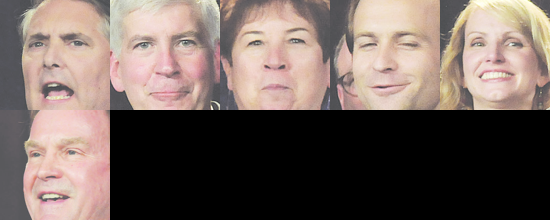

Working on file: a-1.png
Keyword not found in file: a-1.png
Working on file: a-2.png
Keyword not found in file: a-2.png
Working on file: a-3.png
Results found for file: a-3.png


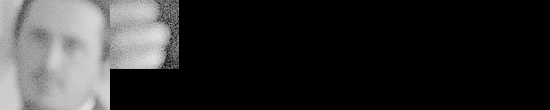

In [15]:
contact_sheets = get_faces_from_keyword("readonly/small_img.zip", "Christopher")

**Using `images.zip` for the last test**

Extracting all the files now...
Done!
Working on file: a-0.png
Results found for file: a-0.png


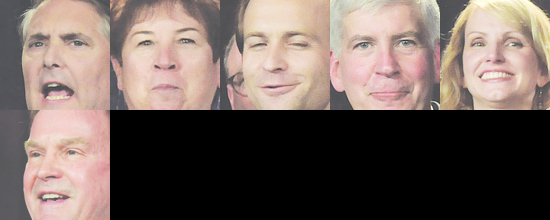

Working on file: a-1.png
Results found for file: a-1.png


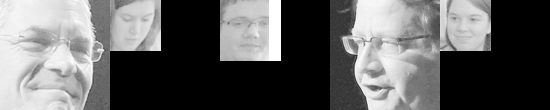

Working on file: a-10.png
Faces not found in file: a-10.png
Working on file: a-11.png
Keyword not found in file: a-11.png
Working on file: a-12.png
Keyword not found in file: a-12.png
Working on file: a-13.png
Results found for file: a-13.png


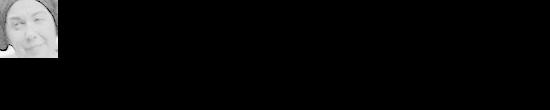

Working on file: a-2.png
Results found for file: a-2.png


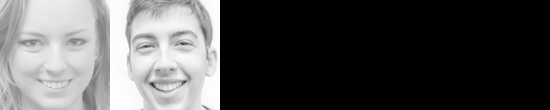

Working on file: a-3.png
Results found for file: a-3.png


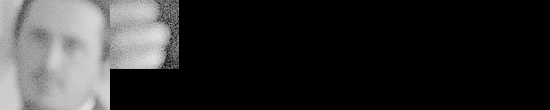

Working on file: a-4.png
Keyword not found in file: a-4.png
Working on file: a-5.png
Results found for file: a-5.png


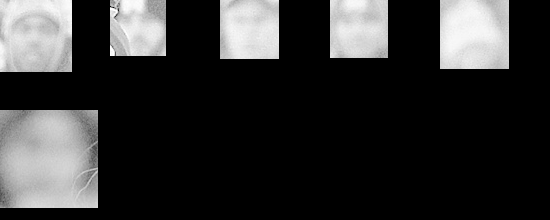

Working on file: a-6.png
Keyword not found in file: a-6.png
Working on file: a-7.png
Keyword not found in file: a-7.png
Working on file: a-8.png
Faces not found in file: a-8.png
Working on file: a-9.png
Results found for file: a-9.png


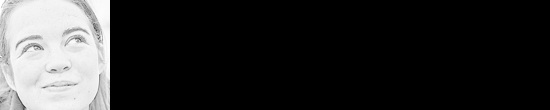

In [23]:
contact_sheets = get_faces_from_keyword("readonly/images.zip", "Mark")